In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

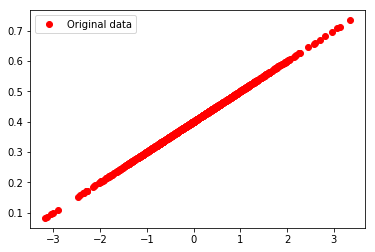

In [2]:

num_points = 1000
vector_set = []

for i in range(num_points):
    W = 0.1
    b = 0.4
    x1 = np.random.normal(0.0,1.0)
    nd = np.random.normal(0.0,0.5)
    y1 = W*x1 +b
#     y1 = y1 + nd
    vector_set.append([x1,y1])
x_data = [v[0] for v in vector_set]
y_data = [v[1] for v in vector_set]
plt.plot(x_data,y_data,'ro',label = 'Original data')
plt.legend()
plt.show()

0 [0.13231453] [0.48318246] 0.00810251
1 [0.09102403] [0.38233513] 0.00040074717
2 [0.1023201] [0.40381864] 2.0416173e-05
3 [0.09942409] [0.39916244] 1.0576172e-06
4 [0.10013945] [0.40018585] 5.5294258e-08
5 [0.09996677] [0.3999584] 2.9040699e-09


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


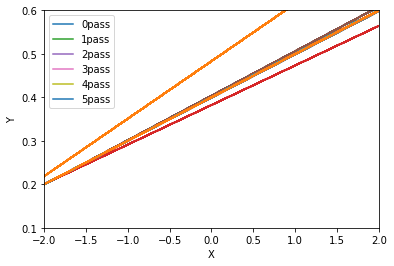

In [3]:
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W*x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.6)

train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(6):
    sess.run(train)
    print(i,sess.run(W),sess.run(b),sess.run(loss))
    ax = plt.subplot()
    ax.plot(x_data,y_data,label = str(i) + "pass")
    ax.plot(x_data,sess.run(W)*x_data + sess.run(b))
    plt.xlabel('X')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('Y')
    plt.legend()

In [4]:
# now this is the same code as above just with few annotations to be used with tensorboard
#heads_up

In [5]:
with tf.name_scope("LinearRegression") as scope:
    W = tf.Variable(tf.zeros([1]))
    b = tf.Variable(tf.zeros([1]))
    y = W*x_data + b
with tf.name_scope('LossFunction') as scope:
    loss = tf.reduce_mean(tf.square(y - y_data))
loss_summary = tf.summary.scalar("loss",loss)

W_ = tf.summary.histogram("W",W)
b_ = tf.summary.histogram('b',b)

merged_op = tf.summary.merge_all()

writer_tensorboard = tf.summary.FileWriter('logs/',tf.get_default_graph())

